In [1]:
from specim_test.specim.specfuncs import spec2d, spec1d
from astropy.io import fits as pf
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
#infile = 'J2145_deimos_det2_100_clean.fits'
infile = 'J2145_deimos_det6_101_clean.fits'

In [3]:
spec = spec2d.Spec2d(infile, hext=1, varext=2)#, xtrim=[0, -5])


Loading file J2145_deimos_det6_101_clean.fits
-----------------------------------------------
Read in 2-dimensional spectrum from J2145_deimos_det6_101_clean.fits (HDU=1)
Final data dimensions (x y): 81 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 81



Text(0, 0.5, 'Angstrom')

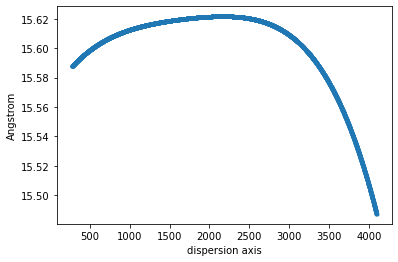

In [4]:
wavim  = pf.open(infile)[4].data
diff = []
spec_pix = np.arange(4096)
for i in range(wavim.shape[0]):
    diff.append(np.max(wavim[i:i+1, :]) - np.min(wavim[i:i+1, :]))
    
plt.figure(facecolor='white') #'#94F008'
plt.plot(spec_pix[280:], diff[280:] , '.')
plt.xlabel('dispersion axis')
plt.ylabel('Angstrom')


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096


Dispersion : 0.650000
Found 2337 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image


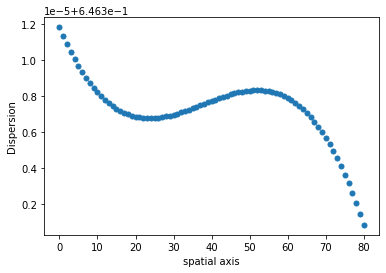

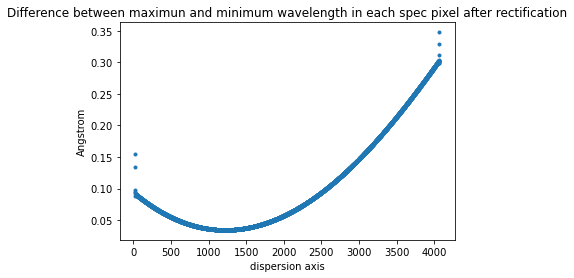

In [5]:
spec.set_dispaxis('y')
spec.do_waverect(doplot=True, resamp_ord=5)

Profile max value (before normalization) 4783.146973


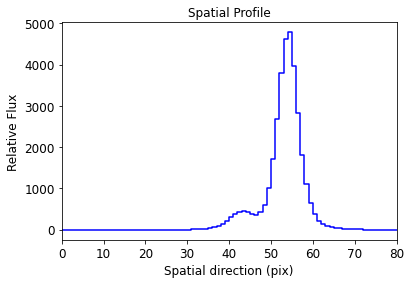

In [6]:
#%matplotlib notebook
profile = spec.spatial_profile(pixrange=[2100, 2500])


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 1
Number of Moffat profile : 3

Now enter constants of the background polynomial upto degree 0
c0 : 3

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 400, 43, 2

amplitude=400.000000, mu=43.000000, sigma=2.000000

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 4000, 55, 3, 4

amplitude=4000.000000, x_0=55.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 3000, 52.5, 3, 4

amplitude=3000.000000, x_0=52.500000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 3 : 200, 46, 3, 4

amplitude=200.000000, x_0=46.000000, gamma=3.000000, alpha=4.000000

Fitt

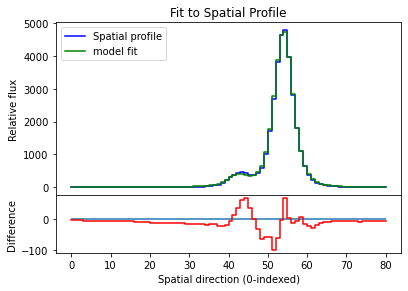

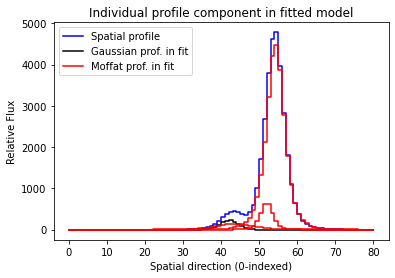


Do you want to start over ? : type yes/no
no


<CompoundModel(c0_0=3.52796333, amplitude_1=225.81918194, mean_1=42.68045526, stddev_1=2.29023547, amplitude_2=4503.78470745, x_0_2=54.80249851, gamma_2=4.62338413, alpha_2=2.38585559, amplitude_3=646.74822679, x_0_3=52.50919327, gamma_3=3.59525075, alpha_3=2.89420599, amplitude_4=140.63734646, x_0_4=44.18430519, gamma_4=8.88350194, alpha_4=2.10339399)>

In [7]:
spec.initial_model()


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 1
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : 3

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 400, 43, 2

amplitude=400.000000, mu=43.000000, sigma=2.000000

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 4000, 55, 3, 4

amplitude=4000.000000, x_0=55.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 200, 46, 3, 4

amplitude=200.000000, x_0=46.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] 

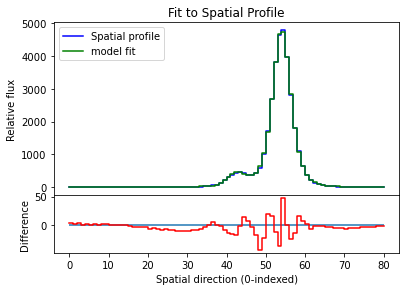

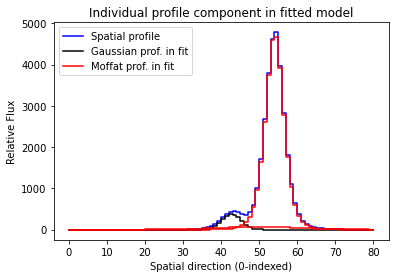


Do you want to start over ? : type yes/no
no


<CompoundModel(c0_0=-3.96909286, amplitude_1=378.82277418, mean_1=43.21253629, stddev_1=2.50617689, amplitude_2=4758.9270706, x_0_2=54.57948617, gamma_2=5.73344137, alpha_2=3.26174494, amplitude_3=69.70591351, x_0_3=50.40545842, gamma_3=38.71028181, alpha_3=7.22981208)>

In [20]:
spec.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-0.4541951)>

    [1]: <Gaussian1D(amplitude=329.81004144, mean=42.44255185, stddev=2.39751973)>

    [2]: <Moffat1D(amplitude=4825.38371841, x_0=54.58255185, gamma=5.48331021, alpha=2.98954152)>

    [3]: <Moffat1D(amplitude=143.89597065, x_0=45.58255185, gamma=5.48331021, alpha=2.98954152)>
Parameters:
            c0_0           amplitude_1    ...      gamma_3           alpha_3     
    ------------------- ----------------- ... ----------------- -----------------
    -0.4541951010836813 329.8100414388093 ... 5.483310209215312 2.989541515596271

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-0.46345817)>

    [1]: <Gaussian1D(amplitude=324.789

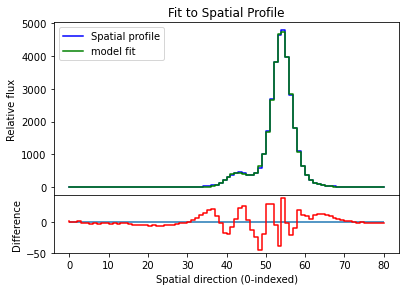

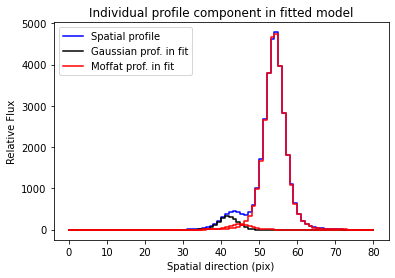

<CompoundModel(c0_0=-0.46345817, amplitude_1=324.78928053, mean_1=42.44219207, stddev_1=2.40160417, amplitude_2=4825.42138017, x_0_2=54.58219207, gamma_2=5.48043425, alpha_2=2.98622618, amplitude_3=147.09257244, x_0_3=45.48219207, gamma_3=5.48043425, alpha_3=2.98622618)>

In [22]:
def tie_pos1_moffat(model):
     return model.x_0_2 - 2.1
            
def tie_pos2_moffat(model):
    return model.x_0_2 - 9.1

def tie_pos3_moffat(model):
    return model.x_0_2 - 12.14

def tie_gamma_moffat(model):
    return model.gamma_2

def tie_alpha_moffat(model):
    return model.alpha_2 

spec.mod0[1].mean.tied = tie_pos3_moffat
spec.mod0[3].x_0.tied = tie_pos2_moffat
#spec.mod0[4].x_0.tied = tie_pos2_moffat
#spec.mod0[4].x_0.tied = tie_pos3_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
spec.mod0[3].gamma.tied = tie_gamma_moffat
spec.mod0[3].alpha.tied = tie_alpha_moffat
#spec.mod0[4].gamma.tied = tie_gamma_moffat
#spec.mod0[4].alpha.tied = tie_alpha_moffat
spec.refined_model(spec.mod0)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: mean_1
Fitting polynomial of degree 3 to parameter: stddev_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2
Fitting polynomial of degree 4 to parameter: x_0_3
Fitting polynomial of degree 3 to parameter: gamma_3
Fitting polynomial of degree 3 to parameter: alpha_3


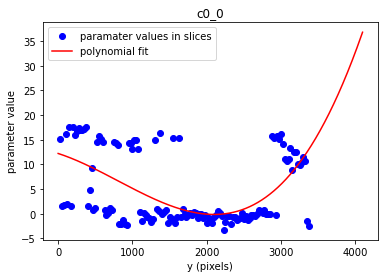

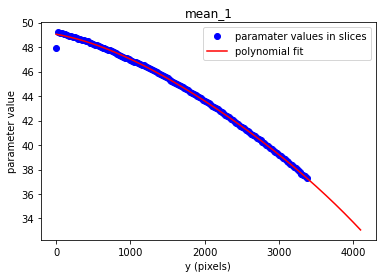

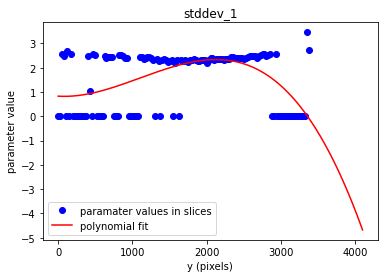

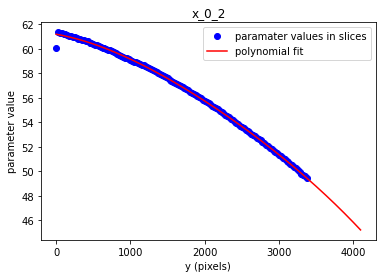

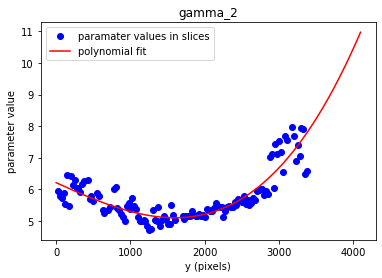

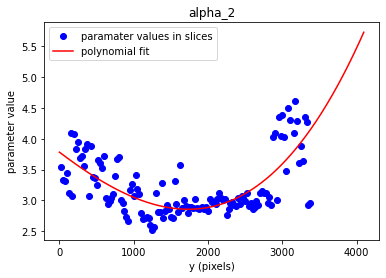

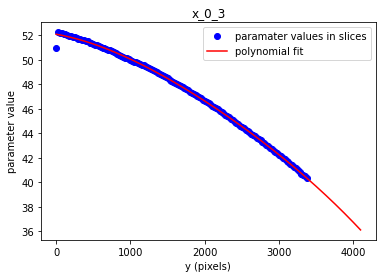

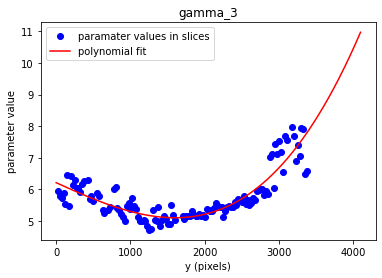

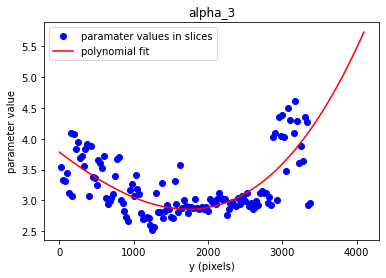

In [25]:
spec.find_and_trace(spec.mod0, stepsize=25, fitorder={'x_0_1':4, 'x_0_2':4, 'x_0_3':4, 'x_0_4':4, 'mean_1':4},
                    fitrange=[0, 3400], polyorder=3)

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 3497
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  7318.97
 Spectrum End:     9591.31
 Dispersion (1st pixel):   0.59
 Dispersion (average):      0.65

 Spectrum Start:  7318.97
 Spectrum End:     9591.31
 Dispersion (1st pixel):   0.59
 Dispersion (average):      0.65

 Spectrum Start:  7318.97
 Spectrum End:     9591.31
 Dispersion (1st pixel):   0.59
 Dispersion (average):      0.65


Plotting the spectrum


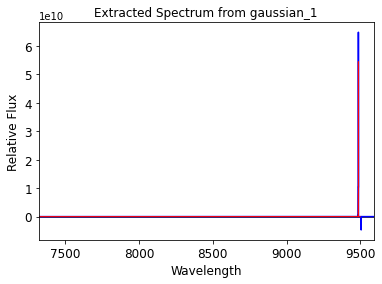

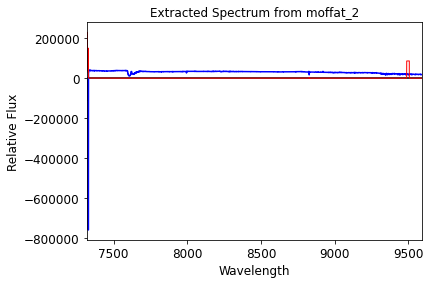

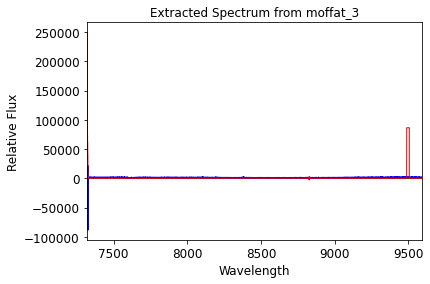

In [26]:
spec.extract(method='modelfit', extrange=[0, -600])

In [82]:
sp_d = spec1d.Spec1d(flux=spec.spectra[2][1]['flux'], wav=spec.spectra[2][1]['wav'], 
                    var=spec.spectra[2][1]['var'], trimsec=[10, -160])

 Spectrum Start:  7325.48
 Spectrum End:     9487.33
 Dispersion (1st pixel):   0.65
 Dispersion (average):      0.65



<IPython.core.display.Javascript object>


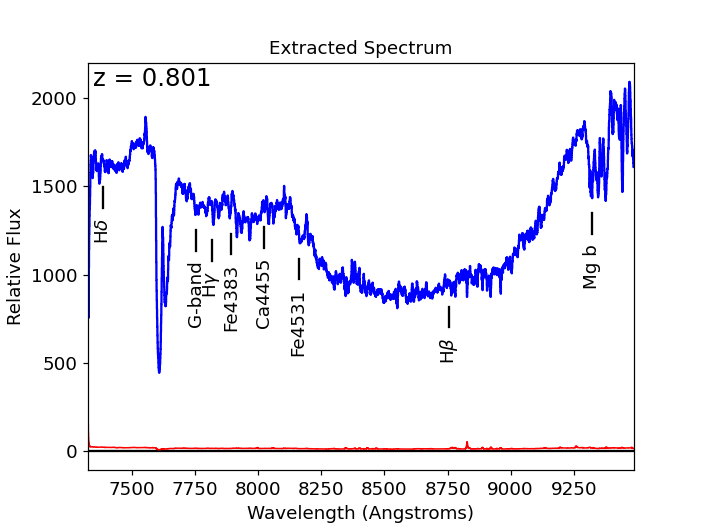


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-delta       4101.00       7385.90
G-band        4305.00       7753.31
H-gamma       4340.00       7816.34
Fe4383        4383.00       7893.78
Ca4455        4455.00       8023.46
Fe4531        4531.00       8160.33
H-beta        4861.00       8754.66
Mg I (b)      5176.00       9321.98



In [83]:
%matplotlib notebook
sp_d.smooth(11)
sp_d.mark_lines('abs', z=.801, usesmooth=True)

In [84]:
sp_d.save('spec1d_J2145_deimos_101_det6_deflector.fits', outformat='fits')

Saved spectrum to file spec1d_J2145_deimos_101_det6_deflector.fits in format fits


In [64]:
sp_im = spec1d.Spec1d(flux=spec.spectra[1][1]['flux'], wav=spec.spectra[1][1]['wav'], 
                    var=spec.spectra[1][1]['var'], trimsec=[15, -180])

 Spectrum Start:  7328.74
 Spectrum End:     9474.33
 Dispersion (1st pixel):   0.65
 Dispersion (average):      0.65




Line        lambda_rest  lambda_obs
----------  -----------  -----------
O III         3047.00       7800.32
O III         3133.00       8020.48
[Ne V]        3346.00       8565.76
[Ne V]        3426.00       8770.56



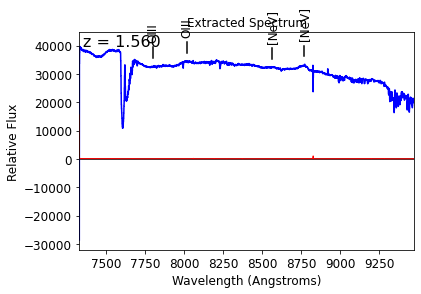

In [68]:
sp_im.smooth(3)
sp_im.mark_lines('em', z=1.56, usesmooth=True)

In [69]:
sp_im = spec1d.Spec1d(flux=spec.spectra[0][1]['flux'], wav=spec.spectra[0][1]['wav'], 
                    var=spec.spectra[0][1]['var'], trimsec=[15, -180])

 Spectrum Start:  7328.74
 Spectrum End:     9474.33
 Dispersion (1st pixel):   0.65
 Dispersion (average):      0.65




Line        lambda_rest  lambda_obs
----------  -----------  -----------
O III         3047.00       7800.32
O III         3133.00       8020.48
[Ne V]        3346.00       8565.76
[Ne V]        3426.00       8770.56



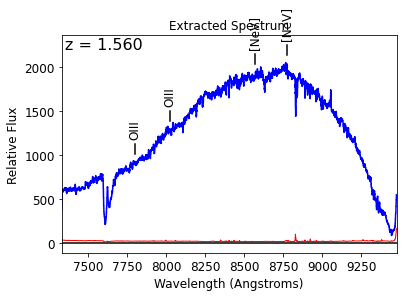

In [71]:
sp_im.smooth(7)
sp_im.mark_lines('em', z=1.56, usesmooth=True)

In [31]:
c = np.nan
d = np.array([c, c, c, c, 0, 7 , 6, c, c])

In [32]:
nan_wav_num_from_end = 0
nan_wav_num_from_start = 0

while np.isnan(d[-1 - nan_wav_num_from_end]):
    nan_wav_num_from_end += 1

while np.isnan(d[0 + nan_wav_num_from_start]):
    nan_wav_num_from_start += 1

for i in range(nan_wav_num_from_end, 0, -1):
    d[-i] = d[-i-1] + 1.0#self.disp
    print(d[-i])

for i in range(nan_wav_num_from_start-1, -1, -1):
    d[i] = d[i+1] - 1.0#self.disp
    print(d[i])

7.0
8.0
-1.0
-2.0
-3.0
-4.0


In [33]:
nan_wav_num_from_start

4

In [34]:
d

array([-4., -3., -2., -1.,  0.,  7.,  6.,  7.,  8.])